In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [7]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,21/09/2020,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134
1,20/09/2020,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657
2,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
3,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
4,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
...,...,...,...,...,...,...,...,...,...,...,...,...
44131,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
44132,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
44133,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
44134,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [8]:
covid.to_csv('covid_data.csv')

In [9]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)
covid.drop("geoId",axis=1,inplace=True)

In [10]:
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,21/09/2020,0,0,Afghanistan,Asia,1.698134
1,20/09/2020,125,4,Afghanistan,Asia,1.892657
2,19/09/2020,47,1,Afghanistan,Asia,1.616645
3,18/09/2020,0,0,Afghanistan,Asia,1.535155
4,17/09/2020,17,0,Afghanistan,Asia,1.653446
...,...,...,...,...,...,...
44131,25/03/2020,0,0,Zimbabwe,Africa,NaN
44132,24/03/2020,0,1,Zimbabwe,Africa,NaN
44133,23/03/2020,0,0,Zimbabwe,Africa,NaN
44134,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [11]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [12]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,21/09/2020,0,0,Afghanistan,Asia,1.698134
1,20/09/2020,125,4,Afghanistan,Asia,1.892657
2,19/09/2020,47,1,Afghanistan,Asia,1.616645
3,18/09/2020,0,0,Afghanistan,Asia,1.535155
4,17/09/2020,17,0,Afghanistan,Asia,1.653446
...,...,...,...,...,...,...
44131,25/03/2020,0,0,Zimbabwe,Africa,NaN
44132,24/03/2020,0,1,Zimbabwe,Africa,NaN
44133,23/03/2020,0,0,Zimbabwe,Africa,NaN
44134,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [13]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
44135,21/03/2020,1,0,Zimbabwe,Africa,NaN
44134,22/03/2020,1,0,Zimbabwe,Africa,NaN
44133,23/03/2020,0,0,Zimbabwe,Africa,NaN
44132,24/03/2020,0,1,Zimbabwe,Africa,NaN
44131,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,17/09/2020,17,0,Afghanistan,Asia,1.653446
3,18/09/2020,0,0,Afghanistan,Asia,1.535155
2,19/09/2020,47,1,Afghanistan,Asia,1.616645
1,20/09/2020,125,4,Afghanistan,Asia,1.892657


In [14]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
44135,21/03/2020,1,0,Zimbabwe,Africa,NaN
44134,22/03/2020,1,0,Zimbabwe,Africa,NaN
44133,23/03/2020,0,0,Zimbabwe,Africa,NaN
44132,24/03/2020,0,1,Zimbabwe,Africa,NaN
44131,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [15]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
19365,31/12/2019,0,0,India,Asia,NaN
19364,01/01/2020,0,0,India,Asia,NaN
19363,02/01/2020,0,0,India,Asia,NaN
19362,03/01/2020,0,0,India,Asia,NaN
19361,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
19105,17/09/2020,97894,1132,India,Asia,92.566640
19104,18/09/2020,96424,1174,India,Asia,93.524107
19103,19/09/2020,93337,1247,India,Asia,94.029443
19102,20/09/2020,92605,1133,India,Asia,94.173835


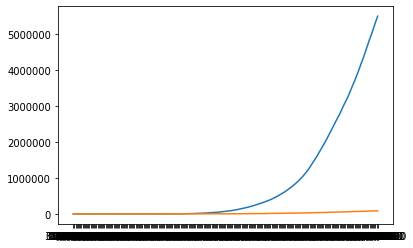

In [16]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

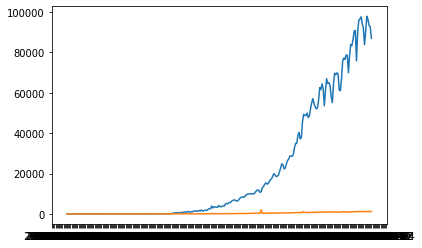

In [17]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

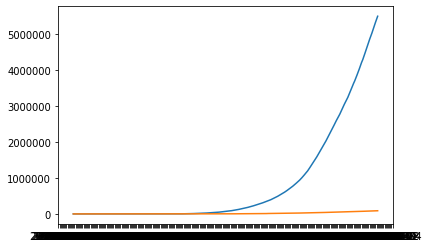

In [18]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_cumulative.png")

In [19]:
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
19365,31/12/2019,0,0,India,Asia,NaN
19364,01/01/2020,0,0,India,Asia,NaN
19363,02/01/2020,0,0,India,Asia,NaN
19362,03/01/2020,0,0,India,Asia,NaN
19361,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
19105,17/09/2020,97894,1132,India,Asia,92.566640
19104,18/09/2020,96424,1174,India,Asia,93.524107
19103,19/09/2020,93337,1247,India,Asia,94.029443
19102,20/09/2020,92605,1133,India,Asia,94.173835


In [20]:
India.to_csv("India_covid.csv", index=False)

In [21]:
India_covid = pd.read_csv("India_covid.csv")
India_covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,India,Asia,NaN
1,01/01/2020,0,0,India,Asia,NaN
2,02/01/2020,0,0,India,Asia,NaN
3,03/01/2020,0,0,India,Asia,NaN
4,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
260,17/09/2020,97894,1132,India,Asia,92.566640
261,18/09/2020,96424,1174,India,Asia,93.524107
262,19/09/2020,93337,1247,India,Asia,94.029443
263,20/09/2020,92605,1133,India,Asia,94.173835


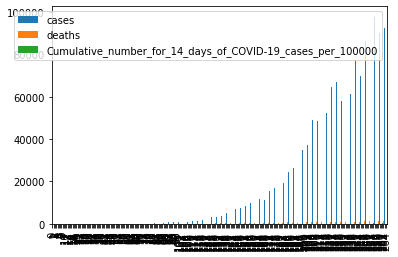

In [22]:
India_covid.plot.bar()

In [23]:
India_covid.drop("country",axis=1,inplace=True)
India_covid.drop("continent",axis=1,inplace=True)
India_covid

,date,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,NaN
1,01/01/2020,0,0,NaN
2,02/01/2020,0,0,NaN
3,03/01/2020,0,0,NaN
4,04/01/2020,0,0,NaN
...,...,...,...,...
260,17/09/2020,97894,1132,92.566640
261,18/09/2020,96424,1174,93.524107
262,19/09/2020,93337,1247,94.029443
263,20/09/2020,92605,1133,94.173835


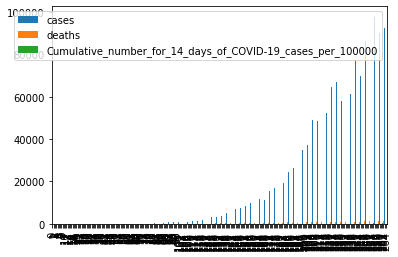

In [24]:
India_covid.plot.bar()

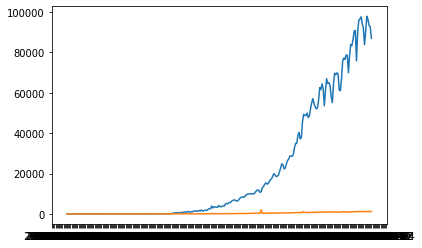

In [25]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_daily.png")

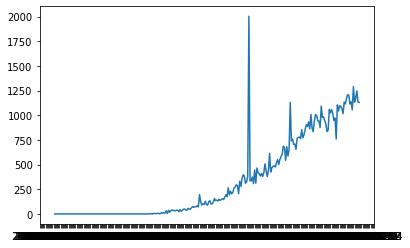

In [26]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
#y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
#plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("deaths_daily.png")

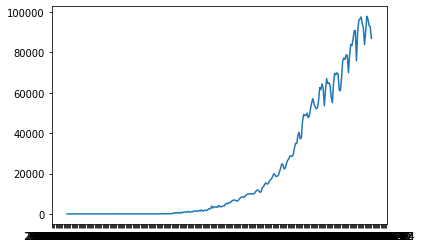

In [27]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
#z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
#plt.plot(x_values, z_values)
plt.savefig("cases_daily.png")